In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.dates as mdates
from matplotlib import animation, rc
from IPython.display import HTML
from scipy import stats
import matplotlib.colors as colors


In [2]:
roots = "D:/Dropbox/Doutorado/Jupyter/GitHub/ADCP_Shear_SSC_Rouse/Output_Data/"
file_names = ['U_fft.pkl', 'V_fft.pkl', 'U_raw.pkl', 'V_raw.pkl', 'Time_fft.pkl', 
              'Time_II_fft.pkl', 'REA.pkl', 'SSC_rea.pkl', 'depth.pkl', 'wave_T_fft.pkl',
              'wave_H_fft.pkl','wave_dir_SC.pkl','wave_dt_stamp.pkl','wave_dt.pkl','C_R.pkl',
              'C_eo.pkl','C_sed.pkl','C_con.pkl','ssc_rouse.pkl','t_m_fft.pkl','ucr_fft.pkl',
              't_max_fft.pkl','Wind_U_spin.pkl','Wind_V_spin.pkl']

# Dicionário para armazenar os dados já processados de velocidadee outros
data = {}

# Loop através dos nomes dos arquivos e carrega os dados usando pickle
for file_name in file_names:
    with open(roots+file_name, 'rb') as file:
        data[file_name.replace('.pkl', '')] = pickle.load(file)

In [3]:
z = np.array([0.90,1.40,1.90,2.40,2.90,3.40,3.90,4.40,4.90,5.40,5.90,6.40,6.90,7.40,7.90,8.40,8.90,9.40,9.90,10.40,10.90,11.40,11.90,12.40,12.90,13.40,13.90,14.40])
M = np.sqrt(data['U_fft']**2+data['V_fft']**2)
UV_dir = np.arctan2(data['V_fft']/M, data['U_fft']/M)
UV_dir_degrees = UV_dir * 180/np.pi

#inteporlando os dados de Vel., SSC_rea, e profundidade para o tempo do simcosta.
M_intp = np.stack([np.interp(data['wave_dt_stamp'], data['Time_II_fft'], M[:, j]) for j in range(len(z))], axis=1)
U_fft_intp = np.stack([np.interp(data['wave_dt_stamp'], data['Time_II_fft'], data['U_fft'][:, j]) for j in range(len(z))], axis=1)
V_fft_intp = np.stack([np.interp(data['wave_dt_stamp'], data['Time_II_fft'], data['V_fft'][:, j]) for j in range(len(z))], axis=1)
M_dir_intp = np.stack([np.interp(data['wave_dt_stamp'], data['Time_II_fft'], UV_dir_degrees[:, j]) for j in range(len(z))], axis=1)
ssc_intp = np.stack([np.interp(data['wave_dt_stamp'], data['Time_II_fft'], data['SSC_rea'][:, j]) for j in range(len(z))], axis=1)
niveis_intp = np.interp(data['wave_dt_stamp'], data['Time_II_fft'], data['depth'])

In [4]:
C_R = data['C_R']
C_eo = data['C_eo']
C_sed = data['C_sed']
C_con =data['C_con']
C = data['ssc_rouse']
time = data['wave_dt']
mask_ssc = np.zeros(len(data['wave_dt_stamp']))
for i in range(len(data['wave_dt_stamp'])):
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(0,28,1), ssc_intp[i,:])
    if slope > 0:
        mask_ssc[i] = 1

    elif slope < 0:
        mask_ssc[i] = 0
        
C_R[mask_ssc == 1] = np.nan
C_eo[mask_ssc == 1] = np.nan
C_sed[mask_ssc == 1] = np.nan
C_con[mask_ssc == 1] = np.nan
C[mask_ssc == 1] = np.nan

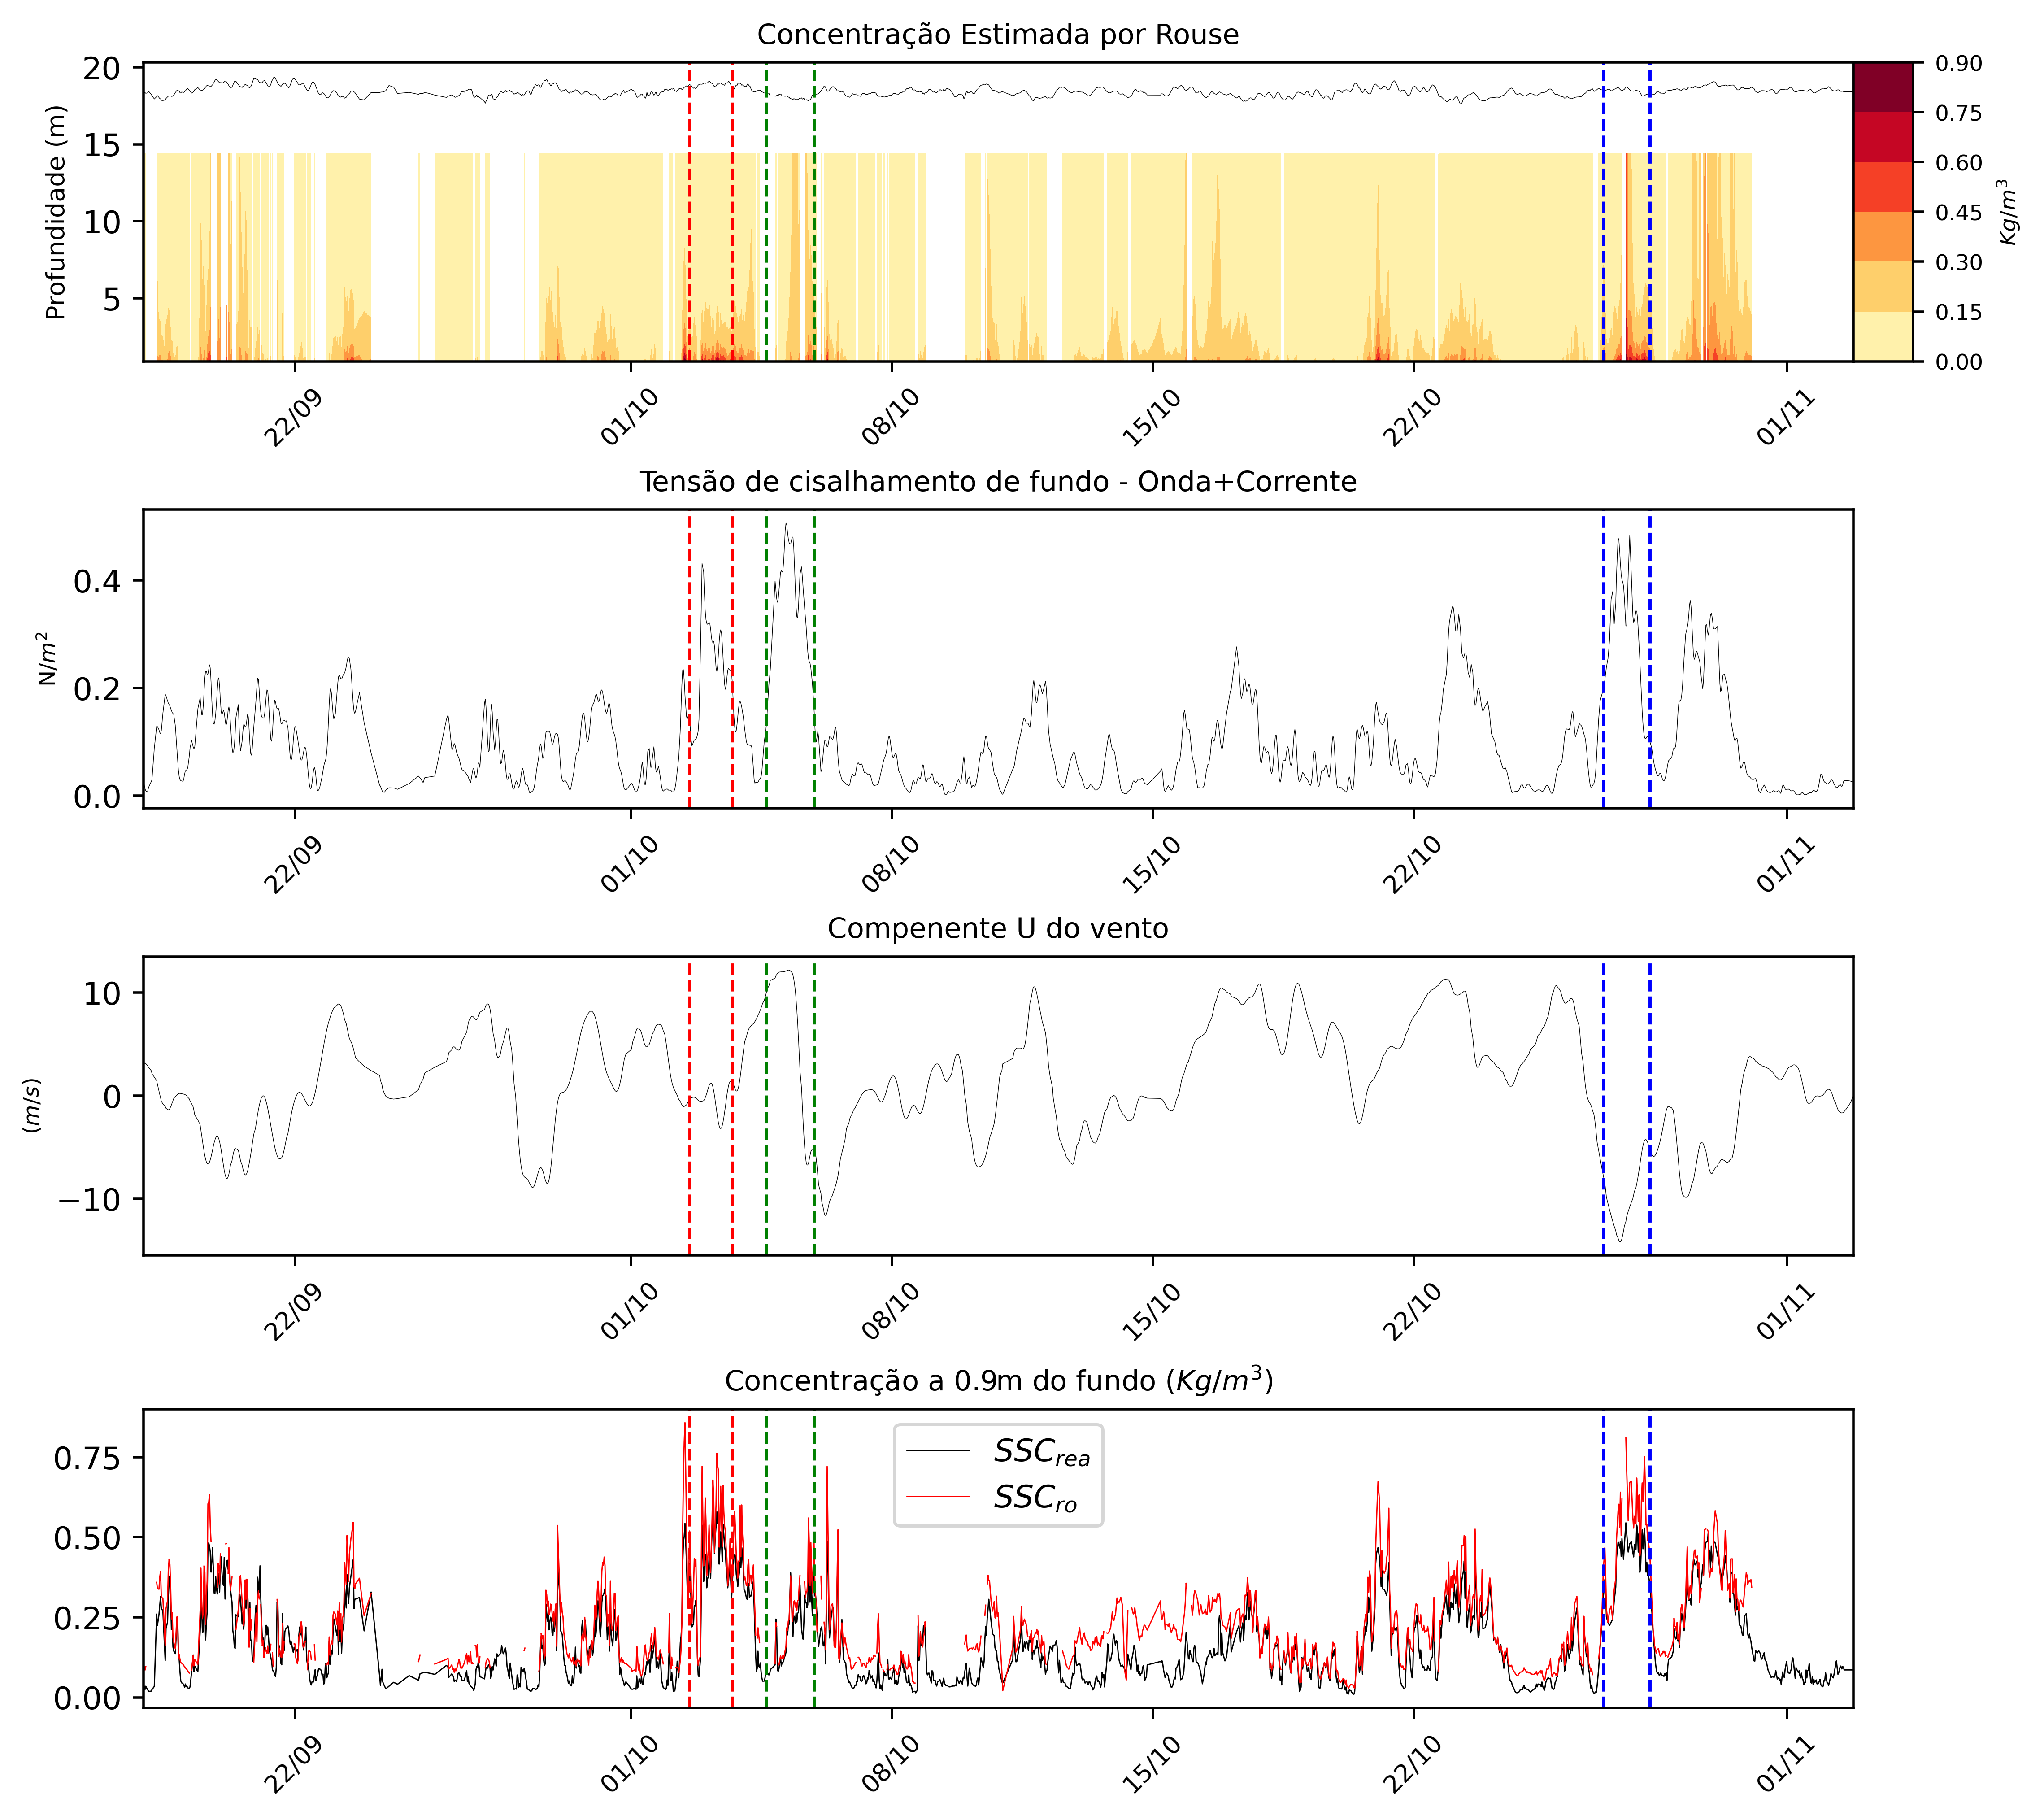

In [11]:
fig, ax = plt.subplots(4,1,figsize=(9,8), dpi = 300, constrained_layout=True)
myFmt = mdates.DateFormatter('%m/%d - %H:%M')

ax[0].set_title("Concentração Estimada por Rouse", fontsize=9)
ax[0].plot(time,niveis_intp[:], linewidth=0.2, color = 'k')
q2 = ax[0].contourf(time,z[:],np.transpose(C[:,:]),cmap=plt.cm.YlOrRd)
q2.set_clim(vmin = 0, vmax = 0.8)
ax[0].set_ylabel('Profundidade (m)', fontsize = 8)

colorbar = fig.colorbar(q2,fraction=0.04, pad=0.000002, ax = ax[0], aspect=5)
colorbar.set_label('$Kg/m^3$', fontsize = 7)
colorbar.ax.tick_params(labelsize=7)

ax[1].set_title('Tensão de cisalhamento de fundo - Onda+Corrente', fontsize = 9)
ax[1].plot(time,data['t_m_fft'], linewidth=0.2, color = 'k')
#ax[1].plot(time,t_mw_array[:], linewidth=0.2, color = 'r')
ax[1].set_ylabel('$\mathrm{N} / m^2$', fontsize = 7)

ax[2].set_title("Compenente U do vento", fontsize = 9)
ax[2].plot(time,data['Wind_U_spin'], linewidth=0.2, color = 'k')
ax[2].set_ylabel('$(m/s)$', fontsize = 7)

ax[3].set_title("Concentração a 0.9m do fundo $(Kg/m^3)$", fontsize = 9)
ax[3].plot(time[:],ssc_intp[:,0]/1000, linewidth=0.4, color = 'k')
ax[3].plot(time[:],C[:,0], linewidth=0.4, color = 'r')
ax[3].legend(('$SSC_{rea} $', '$SSC_{ro}$'))
ax[3].xaxis.set_major_formatter(myFmt)

myFmt = mdates.DateFormatter('%d/%m')
for i in range(4):
    ax[i].xaxis.set_major_formatter(myFmt)
    ax[i].axvline(x=time[530], linewidth=1, color='r', linestyle='--')
    ax[i].axvline(x=time[580], linewidth=1, color='r', linestyle='--') 
    ax[i].axvline(x=time[620], linewidth=1, color='g', linestyle='--')
    ax[i].axvline(x=time[670], linewidth=1, color='g', linestyle='--') 
    ax[i].axvline(x=time[1494], linewidth=1, color='b', linestyle='--')
    ax[i].axvline(x=time[1540], linewidth=1, color='b', linestyle='--')

    ax[i].set_xlim(time[0],time[-1])    
    ax[i].set_xticklabels([], rotation = 45 ,fontsize = 8)
    ax[i].xaxis.set_major_formatter(myFmt)
   #ax[i].set_xticks([dt[12],dt[300],dt[620],dt[700],dt[1100],dt[1506],dt[1551],dt[1777]])


(0.0, 0.6)

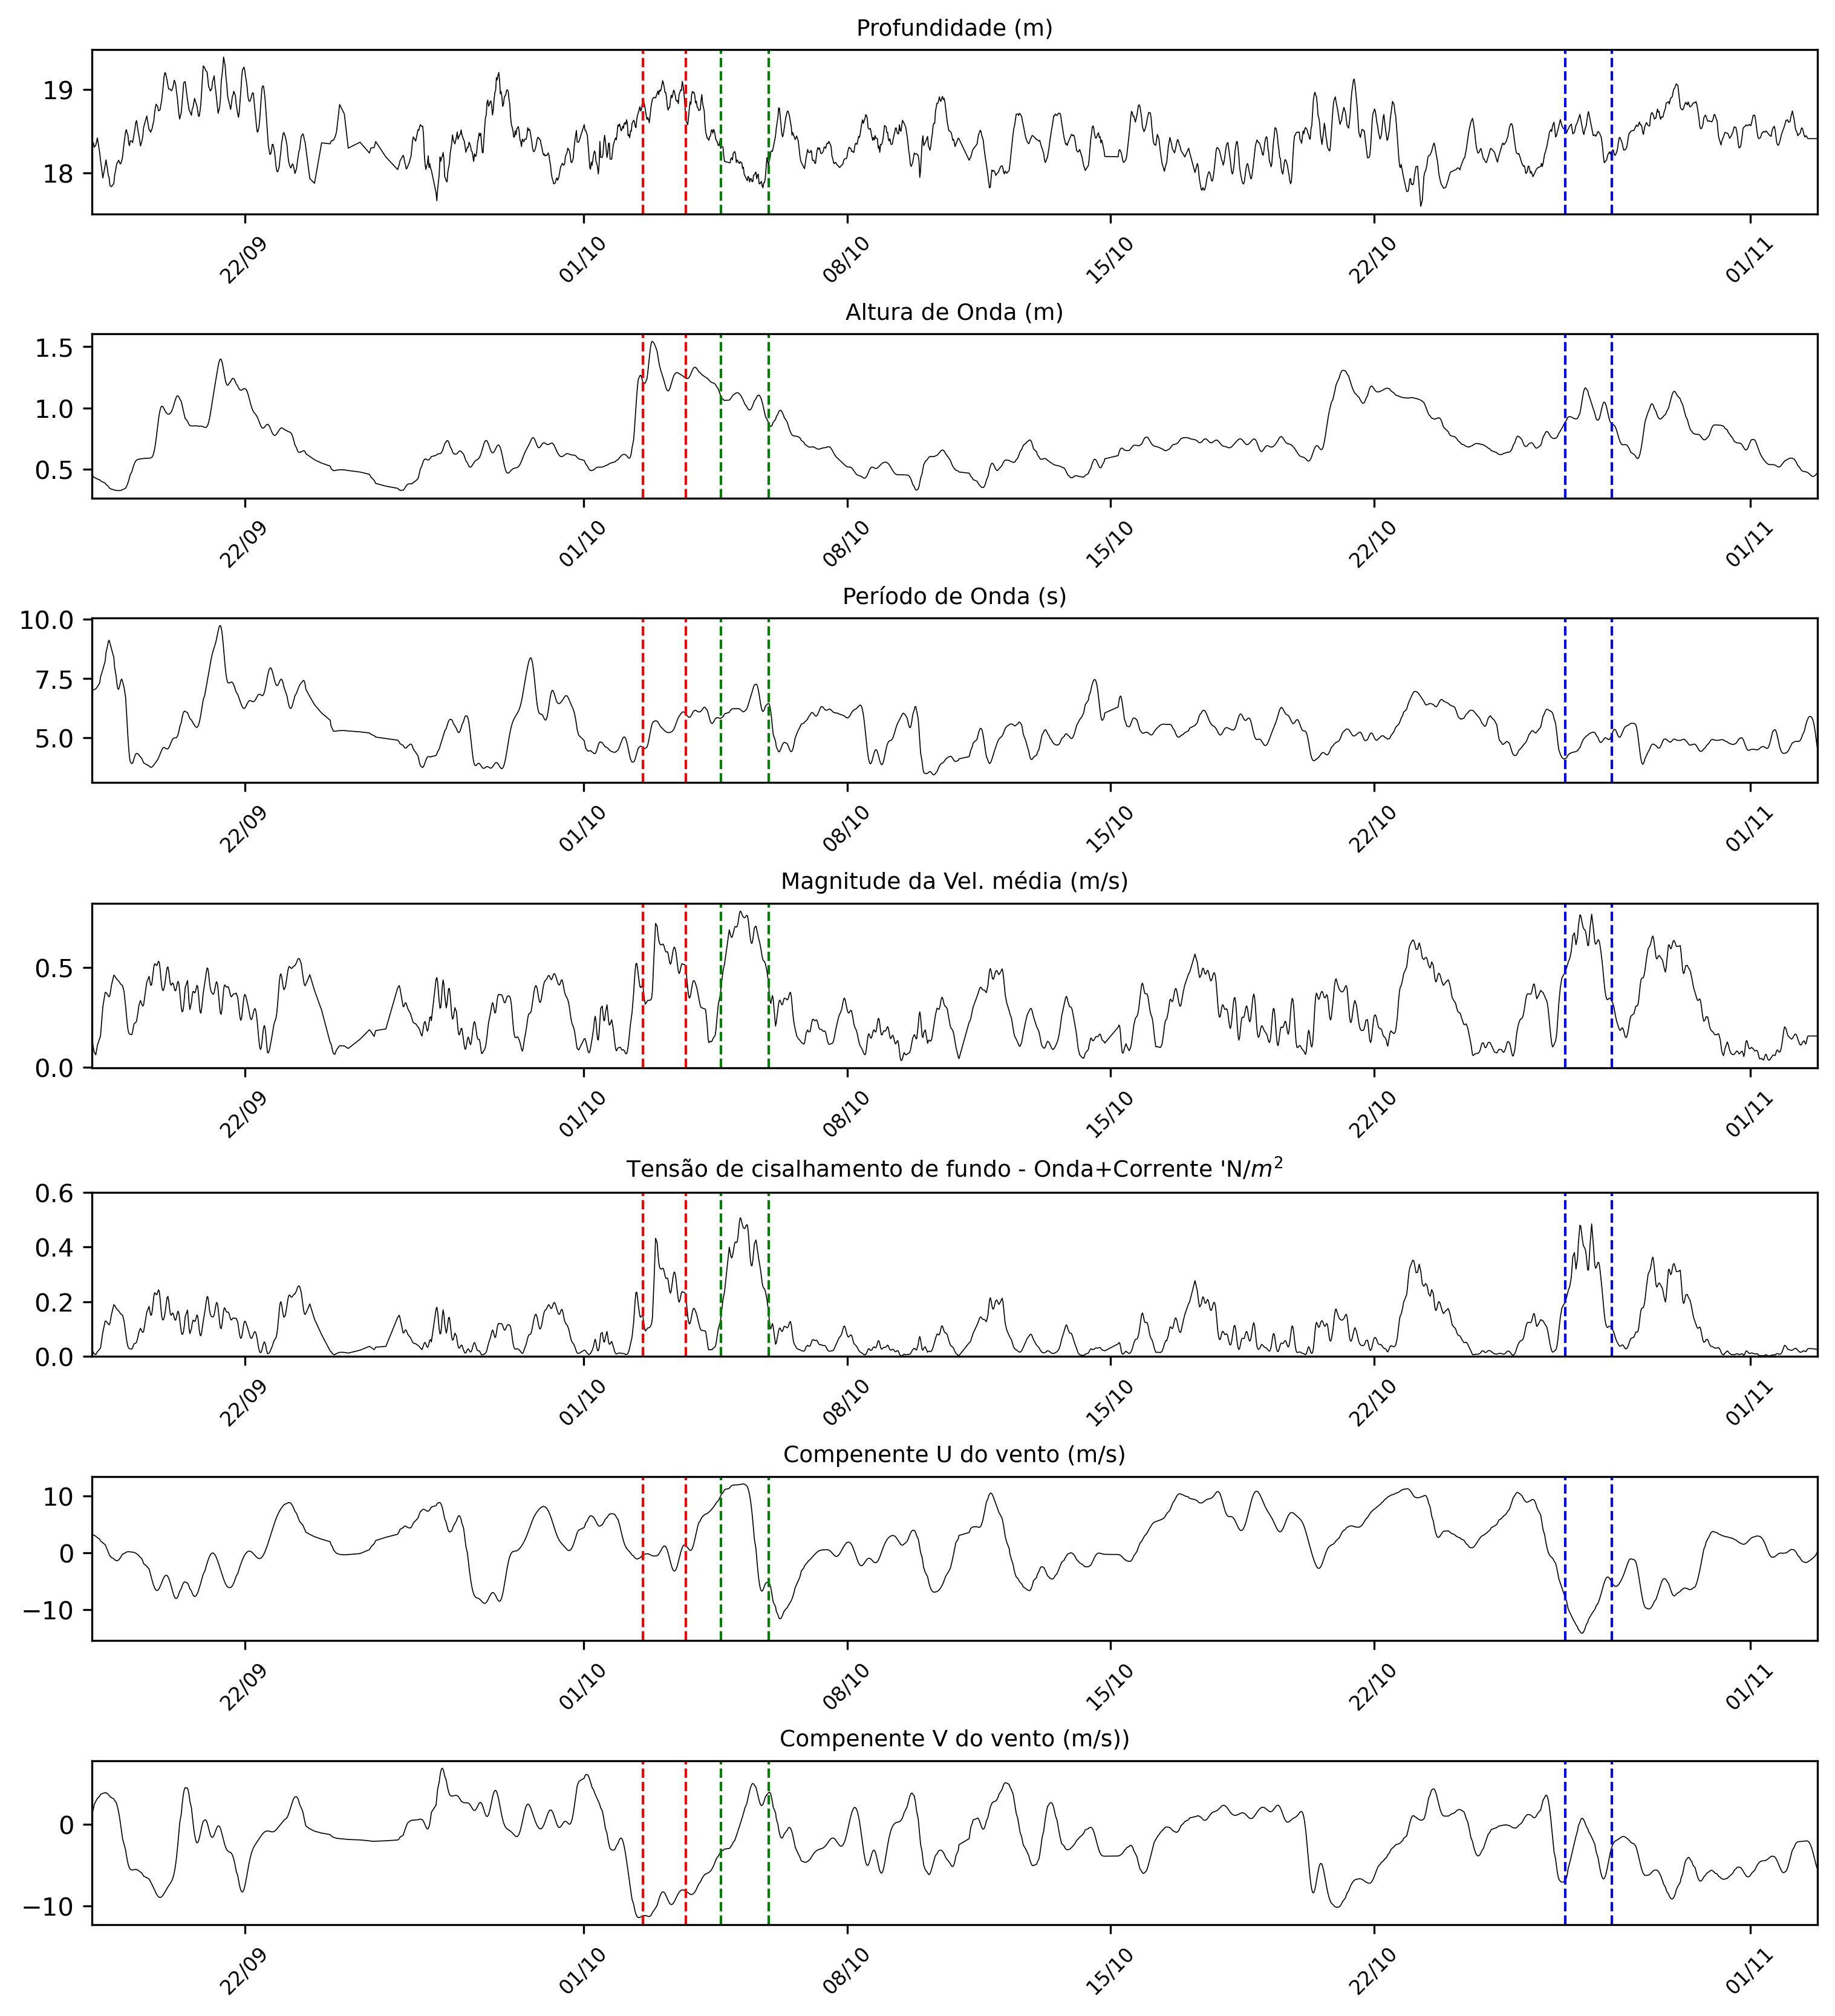

In [15]:
mag = np.nanmean(M_intp,1)

fig, ax = plt.subplots(7,1,figsize=(10, 11), dpi = 300, constrained_layout = True)

ax[0].set_title("Profundidade (m)", fontsize = 9)
ax[0].plot(data['wave_dt'], niveis_intp, linewidth=0.4, color = 'k')
ax[1].set_title("Altura de Onda (m)", fontsize = 9)
ax[1].plot(data['wave_dt'],data['wave_H_fft'], linewidth=0.4, color = 'k')
ax[2].set_title("Período de Onda (s)", fontsize = 9)
ax[2].plot(data['wave_dt'],data['wave_T_fft'], linewidth=0.4, color = 'k')
ax[3].set_title("Magnitude da Vel. média (m/s)", fontsize = 9)
ax[3].plot(data['wave_dt'],mag, linewidth=0.4, color = 'k')
ax[4].set_title("Tensão de cisalhamento de fundo - Onda+Corrente '$\mathrm{N} / m^2$", fontsize = 9)
ax[4].plot(data['wave_dt'],data['t_m_fft'], linewidth=0.4, color = 'k')
ax[5].set_title("Compenente U do vento (m/s)", fontsize = 9)
ax[5].plot(data['wave_dt'],data['Wind_U_spin'], linewidth=0.4, color = 'k')
ax[6].set_title("Compenente V do vento (m/s))", fontsize = 9)
ax[6].plot(data['wave_dt'],data['Wind_V_spin'], linewidth=0.4, color = 'k')

myFmt = mdates.DateFormatter('%d/%m')
for i in range(7):
    ax[i].xaxis.set_major_formatter(myFmt)
    ax[i].axvline(x=time[530], linewidth=1, color='r', linestyle='--')
    ax[i].axvline(x=time[580], linewidth=1, color='r', linestyle='--') 
    ax[i].axvline(x=time[620], linewidth=1, color='g', linestyle='--')
    ax[i].axvline(x=time[670], linewidth=1, color='g', linestyle='--') 
    ax[i].axvline(x=time[1494], linewidth=1, color='b', linestyle='--')
    ax[i].axvline(x=time[1540], linewidth=1, color='b', linestyle='--')

    ax[i].set_xlim(time[0],time[-1])    
    ax[i].set_xticklabels([], rotation = 45 ,fontsize = 8)
    ax[i].xaxis.set_major_formatter(myFmt)
    
ax[4].set_ylim(0, 0.6)


#plt.savefig('soulsby_parametros.tif')


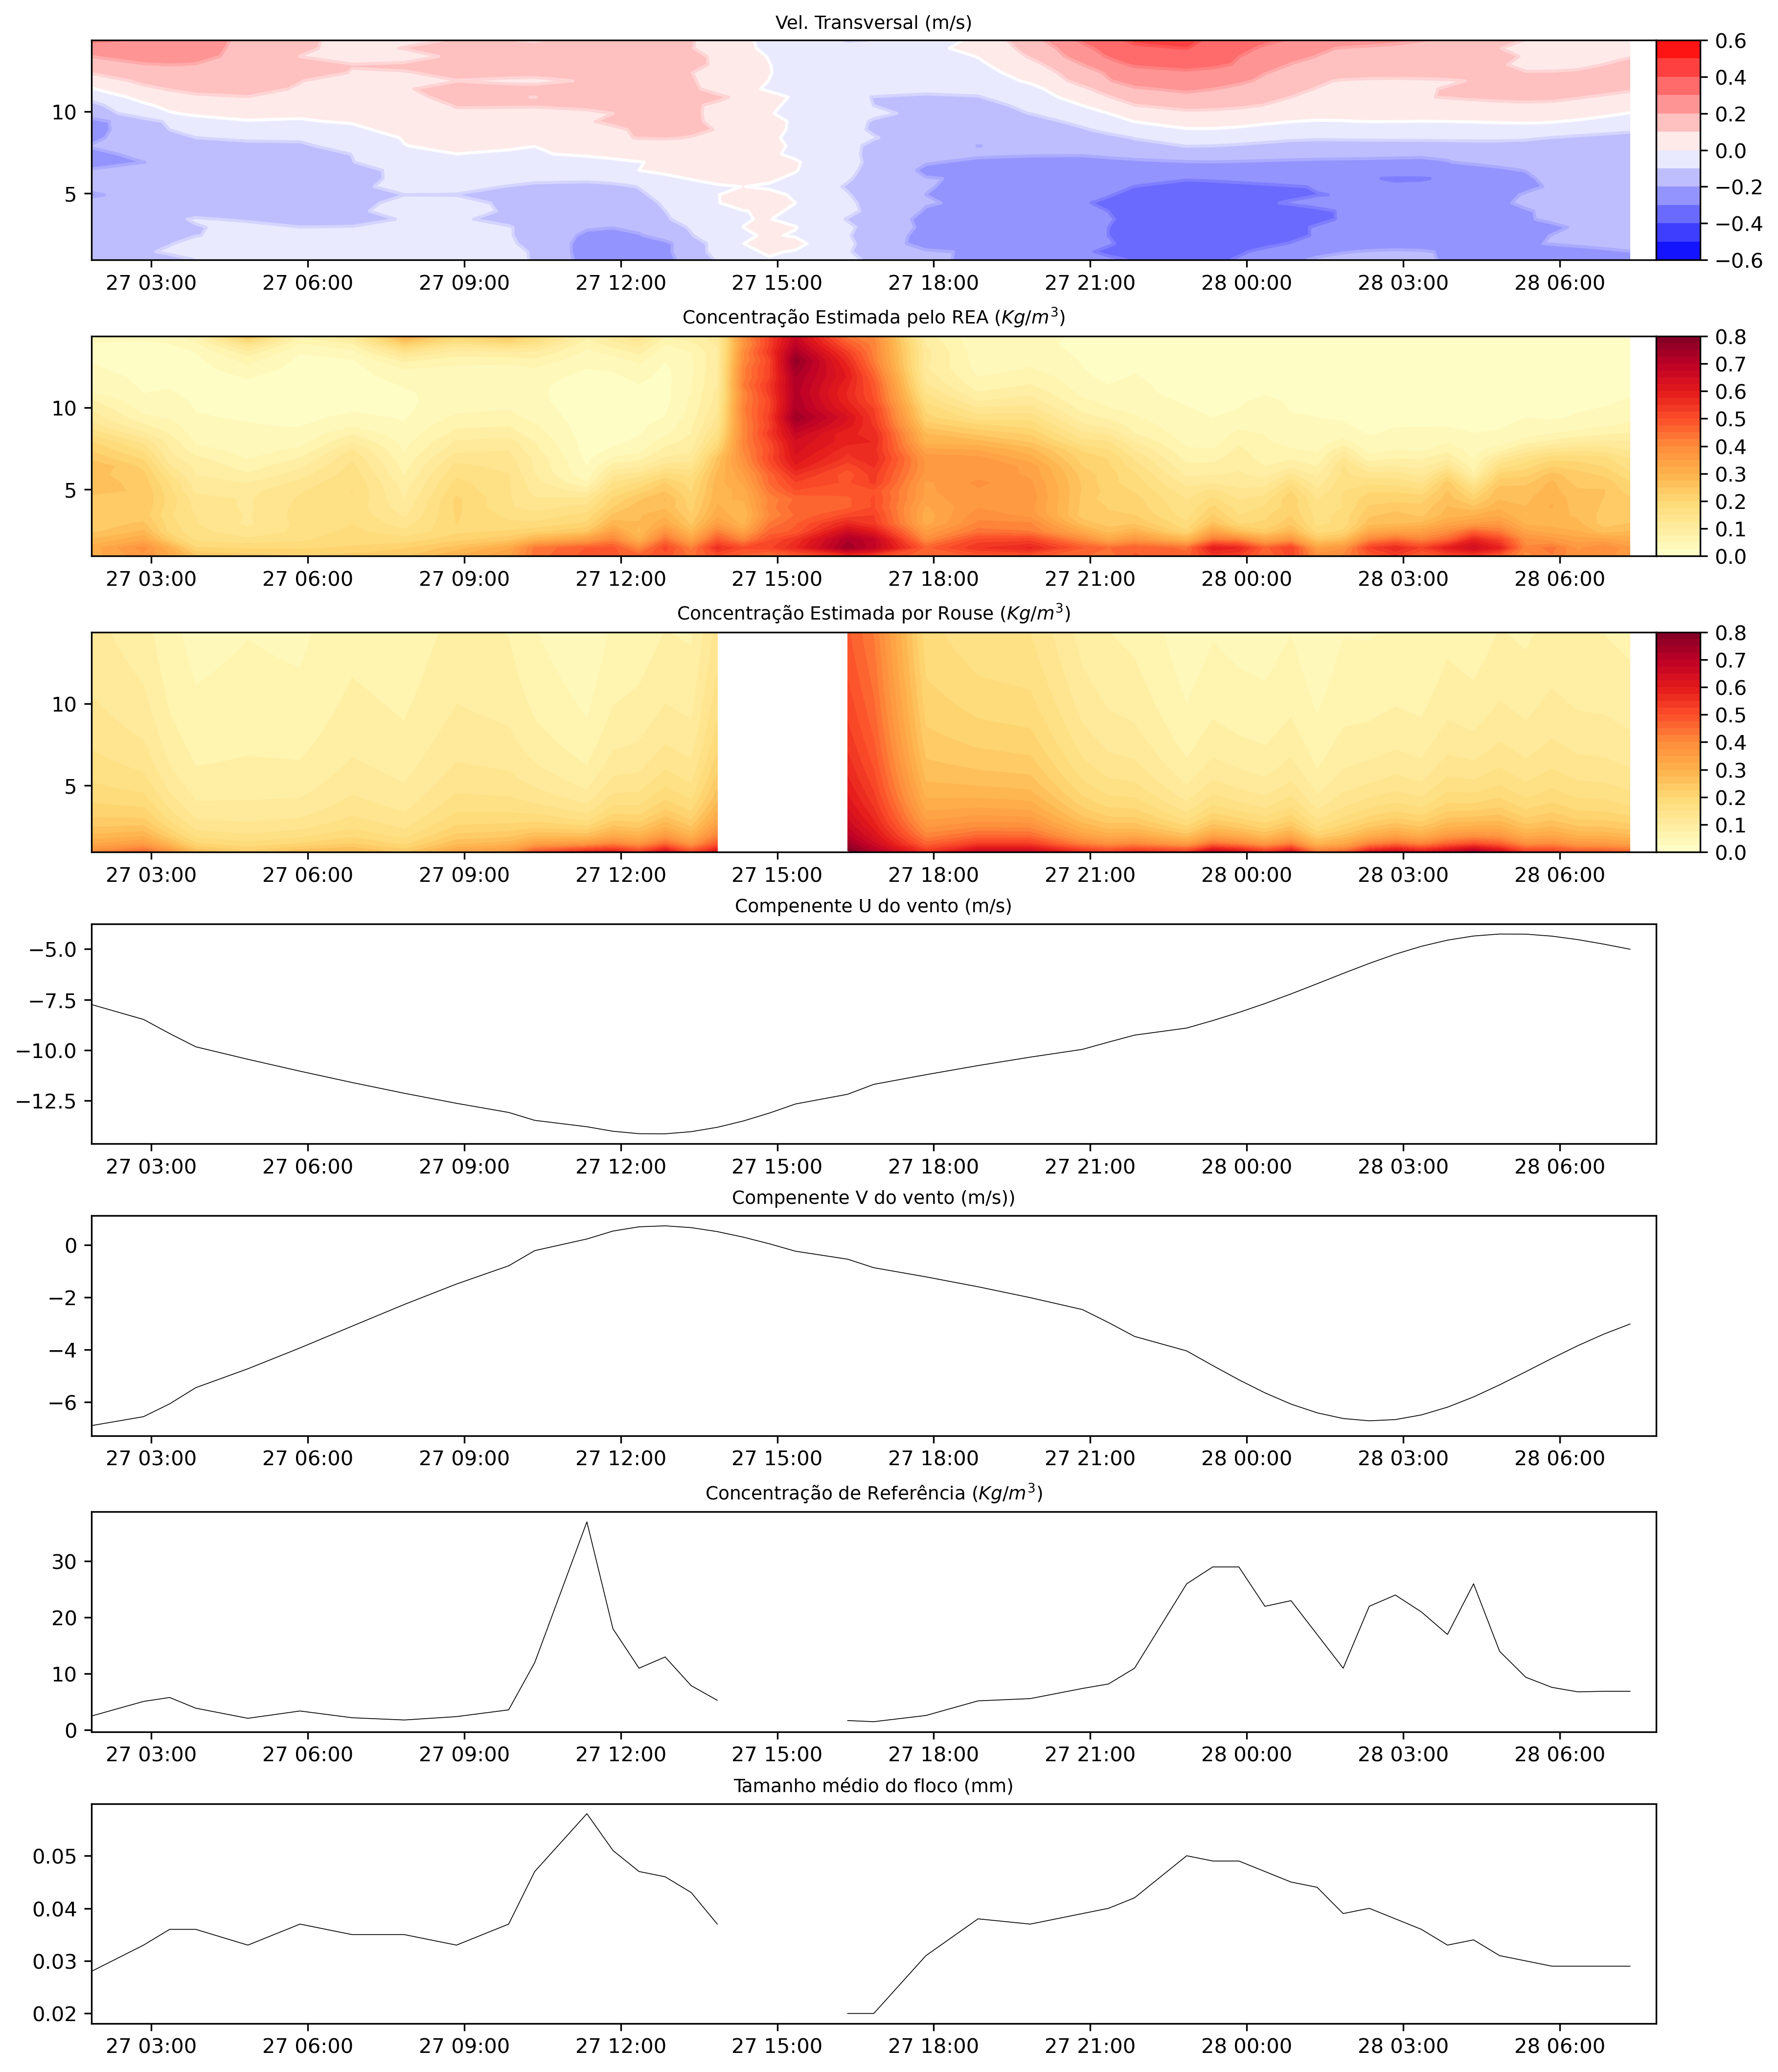

In [22]:
cc = 1494
ccc = 1540
myFmt = mdates.DateFormatter('%d %H:%M')

fig, ax = plt.subplots(7,1,figsize = (12,14), dpi=300, constrained_layout=True)
fix = np.arange(cc,ccc,1)


#divnorm = colors.TwoSlopeNorm(vmin = np.nanmin(V_fft_intp][:]),vcenter = 0, vmax = np.nanmax(V_fft_intp[:]))
divnorm = colors.TwoSlopeNorm(vmin = -0.6,vcenter = 0, vmax = 0.6)

ax[0].set_title("Vel. Transversal (m/s)", fontsize=9)
ax[0].contour(time[cc:ccc],z[:],np.transpose(V_fft_intp[cc:ccc,:]),np.arange(-0.6,0.7,0.1),cmap=plt.cm.bwr, norm = divnorm)
q = ax[0].contourf(time[cc:ccc],z[:],np.transpose(V_fft_intp[cc:ccc,:]),np.arange(-0.6,0.7,0.1),cmap=plt.cm.bwr, norm = divnorm)
colorbar = fig.colorbar(q,fraction=0.04, pad=0.000002, ax = ax[0], aspect=5)
colorbar.ax.tick_params(labelsize=10)
ax[0].set_xlim(time[cc],time[ccc])    
ax[0].xaxis.set_major_formatter(myFmt)


ax[1].set_title("Concentração Estimada pelo REA $(Kg/m^3$)", fontsize = 9)
q = ax[1].contourf(time[cc:ccc],z[:],np.transpose(ssc_intp[cc:ccc,:]/1000),np.arange(0,np.nanmax(C[cc:ccc,:]),0.025),cmap=plt.cm.YlOrRd)
colorbar = fig.colorbar(q,fraction=0.04, pad=0.000002, ax = ax[1], aspect=5)
colorbar.ax.tick_params(labelsize=10)
ax[1].set_xlim(time[cc],time[ccc])    
ax[1].xaxis.set_major_formatter(myFmt)


ax[2].set_title("Concentração Estimada por Rouse $(Kg/m^3$)", fontsize = 9)
q = ax[2].contourf(time[cc:ccc],z[:],np.transpose(C[cc:ccc,:]),np.arange(0,np.nanmax(C[cc:ccc,:]),0.025),cmap=plt.cm.YlOrRd)
colorbar = fig.colorbar(q,fraction=0.04, pad=0.000002, ax = ax[2], aspect=5)
colorbar.ax.tick_params(labelsize=10)
ax[2].set_xlim(time[cc],time[ccc])    
ax[2].xaxis.set_major_formatter(myFmt)

ax[3].set_title("Compenente U do vento (m/s)", fontsize = 9)
ax[3].plot(time[cc:ccc],data['Wind_U_spin'][cc:ccc], linewidth=0.4, color = 'k')
ax[3].set_xlim(time[cc],time[ccc])    
ax[3].xaxis.set_major_formatter(myFmt)

ax[4].set_title("Compenente V do vento (m/s))", fontsize = 9)
ax[4].plot(time[cc:ccc],data['Wind_V_spin'][cc:ccc], linewidth=0.4, color = 'k')
ax[4].set_xlim(time[cc],time[ccc])    
ax[4].xaxis.set_major_formatter(myFmt)

ax[5].set_title("Concentração de Referência $(Kg/m^3)$", fontsize = 9)
ax[5].plot(time[cc:ccc],C_con[cc:ccc], linewidth=0.4, color = 'k')
ax[5].set_xlim(time[cc],time[ccc])    
ax[5].xaxis.set_major_formatter(myFmt)

ax[6].set_title("Tamanho médio do floco (mm)", fontsize = 9)
ax[6].plot(time[cc:ccc],C_sed[cc:ccc], linewidth=0.4, color = 'k')
ax[6].set_xlim(time[cc],time[ccc])    
ax[6].xaxis.set_major_formatter(myFmt)
#plt.savefig('vento_X_Vcomp_X_Crea_X_floc_2610-2810.tif')


Text(0.8, 11, '95%')

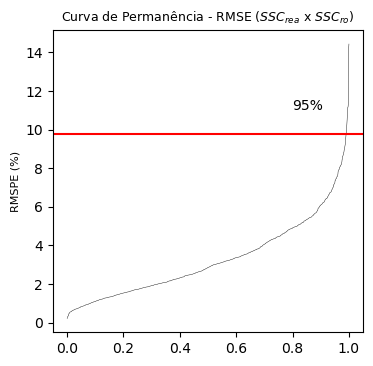

In [8]:
cpx = np.linspace(0,1, len(C_R[~(np.isnan(C_R))]))
cpy = np.sort(C_R[~(np.isnan(C_R))])

fig, ax = plt.subplots(figsize=(4,4), dpi = 100)
ax.plot(cpx,cpy*100, linewidth=0.3, color = 'k')
plt.title("Curva de Permanência - RMSE ($SSC_{rea}$ x $SSC_{ro}$)", fontsize=9)
plt.axhline(y =np.interp(0.99,cpx,cpy*100), color='r')
ax.set_ylabel('RMSPE (%)', fontsize = 8)
ax.annotate('95%', xy=(0.8, 11))